In [1]:
%load_ext autoreload
%autoreload 2

# Imports

In [2]:
from trott import *
from qiskit import IBMQ
from qiskit.providers.aer import QasmSimulator
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Prepare Circuits

In [3]:
trott_gate = gen_3cnot_trott_gate() # using the basic trott method (this can be changed)x
trott_steps_range = np.arange(4,25,1)
qcs = gen_st_qcs_range(trott_gate, trott_steps_range)

In [4]:
qcs[10][-2].draw() # e.g. 10 trott steps, example tomo circuit

»
q7_0: ─────────────────────────────────────────────────────────────────»
           ┌─────────────┐┌─────────────┐┌─────────────┐┌─────────────┐»
q7_1: ─────┤0            ├┤0            ├┤0            ├┤0            ├»
           │             ││             ││             ││             │»
q7_2: ─────┤             ├┤             ├┤             ├┤             ├»
      ┌───┐│             ││             ││             ││             │»
q7_3: ┤ X ├┤1 Trot(π/10) ├┤1 Trot(π/10) ├┤1 Trot(π/10) ├┤1 Trot(π/10) ├»
      └───┘│             ││             ││             ││             │»
q7_4: ─────┤             ├┤             ├┤             ├┤             ├»
      ┌───┐│             ││             ││             ││             │»
q7_5: ┤ X ├┤2            ├┤2            ├┤2            ├┤2            ├»
      └───┘└─────────────┘└─────────────┘└─────────────┘└─────────────┘»
q7_6: ─────────────────────────────────────────────────────────────────»
                                                                       »
c6: 3/═════════════════════════════════════════════════════════════════»
                                                                       »
«                                                                  »
«q7_0: ────────────────────────────────────────────────────────────»
«      ┌─────────────┐┌─────────────┐┌─────────────┐┌─────────────┐»
«q7_1: ┤0            ├┤0            ├┤0            ├┤0            ├»
«      │             ││             ││             ││             │»
«q7_2: ┤             ├┤             ├┤             ├┤             ├»
«      │             ││             ││             ││             │»
«q7_3: ┤1 Trot(π/10) ├┤1 Trot(π/10) ├┤1 Trot(π/10) ├┤1 Trot(π/10) ├»
«      │             ││             ││             ││             │»
«q7_4: ┤             ├┤             ├┤             ├┤             ├»
«      │             ││             ││             ││             │»
«q7_5: ┤2            ├┤2            ├┤2            ├┤2            ├»
«      └─────────────┘└─────────────┘└─────────────┘└─────────────┘»
«q7_6: ────────────────────────────────────────────────────────────»
«                                                                  »
«c6: 3/════════════════════════════════════════════════════════════»
«                                                                  »
«                                     ░                      
«q7_0: ───────────────────────────────░──────────────────────
«      ┌─────────────┐┌─────────────┐ ░ ┌─┐                  
«q7_1: ┤0            ├┤0            ├─░─┤M├──────────────────
«      │             ││             │ ░ └╥┘                  
«q7_2: ┤             ├┤             ├─░──╫───────────────────
«      │             ││             │ ░  ║ ┌─┐               
«q7_3: ┤1 Trot(π/10) ├┤1 Trot(π/10) ├─░──╫─┤M├───────────────
«      │             ││             │ ░  ║ └╥┘               
«q7_4: ┤             ├┤             ├─░──╫──╫────────────────
«      │             ││             │ ░  ║  ║ ┌─────┐┌───┐┌─┐
«q7_5: ┤2            ├┤2            ├─░──╫──╫─┤ Sdg ├┤ H ├┤M├
«      └─────────────┘└─────────────┘ ░  ║  ║ └─────┘└───┘└╥┘
«q7_6: ───────────────────────────────░──╫──╫──────────────╫─
«                                     ░  ║  ║              ║ 
«c6: 3/══════════════════════════════════╩══╩══════════════╩═
«                                        0  1              2

# Prepare Backend

In [5]:
# load IBMQ Account data

# IBMQ.save_account(TOKEN)  # replace TOKEN with your API token string (https://quantum-computing.ibm.com/lab/docs/iql/manage/account/ibmq)
provider = IBMQ.load_account()

In [6]:
# Get backend for experiment
provider = IBMQ.get_provider(hub='ibm-q-community', group='ibmquantumawards', project='open-science-22')
jakarta = provider.get_backend('ibmq_jakarta')
# properties = jakarta.properties()

# Simulated backend based on ibmq_jakarta's device noise profile
sim_noisy_jakarta = QasmSimulator.from_backend(provider.get_backend('ibmq_jakarta'))

# Noiseless simulated backend
sim = QasmSimulator()

# Capture Data

In [7]:
results = gen_results(qcs, backend=sim_noisy_jakarta, label="data/3cnot_noise_sim")
# results = np.load('data/3cnot_noise_sim_results_20220414__112011.npy',allow_pickle=True, ).item()

  0%|                                                                                                                 | 0/21 [00:00<?, ?it/s]

Running with trott_steps = 4
Job ID 90719cdf-37b7-4e1d-b51f-018e3dc23f73
Job ID 351698ba-6529-4d0e-b725-bfefdecb7066
Job ID 3ad247a4-7140-4a2a-b890-c7ffdf8f1cbf
Job ID c8ce0234-2ca1-4df9-a54f-d261ef5db579
Job ID a2738b11-78b5-4e99-94ea-97737e7e32a2
Job ID 43d3c3d9-4ab3-4ef4-bd25-2598b688c08e
Job ID 475cffd6-f185-4e56-83a0-35ce9f1582dd
Job ID 9f53a57b-5c3c-4526-90a4-67e16fc43044
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


  5%|█████                                                                                                    | 1/21 [00:44<14:52, 44.65s/it]

Running with trott_steps = 5
Job ID 90d464c4-19d0-4b35-867e-3c207093aaa7
Job ID 94843fb3-c68e-461e-b8e1-578411ff8f22
Job ID 4f7c7d6f-2123-43e6-8ce9-2953f5dd020f
Job ID 6718eeb0-3abd-4cce-8b48-8823778813d2
Job ID d4c9181c-2e5e-4727-8e06-68ea80a0ee0a
Job ID 8e3881e1-7ae5-453b-ac4e-f751f06a1191
Job ID e1ddcaba-8cc9-48d8-a820-a5ccbe9a3eb0
Job ID 5091da3c-62b3-49f9-a97c-099b8bf08df7
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 10%|██████████                                                                                               | 2/21 [01:30<14:18, 45.19s/it]

Running with trott_steps = 6
Job ID 660706ee-9d10-4eb9-bc4a-2fae91800296
Job ID 2b6de38c-a105-49dc-8aa9-4217d6abe0fd
Job ID 5796bdad-5f2f-4efd-9e19-7e8dd9964d1e
Job ID 4e21eb94-5615-4235-81d8-ff54892c12b4
Job ID 057e2fce-051e-4657-97fb-59a45a3291f5
Job ID 0b70a116-0947-4f3a-9cdc-6c9554d43275
Job ID af7b93a0-e6e7-453b-b8f4-c1e267c8c159
Job ID 38e2f024-e070-451a-896e-0384d9d5cc84
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 14%|███████████████                                                                                          | 3/21 [02:19<14:02, 46.83s/it]

Running with trott_steps = 7
Job ID 4e0073d6-6855-4332-b465-2d43e21561aa
Job ID a3fd3eea-53ad-482e-998f-cf2011eb5f26
Job ID 4a210d48-2d88-4204-8a23-e845dae727b2
Job ID 984659f8-4a23-4544-9ca8-e62baf65ee00
Job ID ab49ae23-5ec1-4eb6-822d-0d8b6a0d45d2
Job ID c6ca7541-2513-49bb-ae9e-7674f9c0d0dc
Job ID c045b09d-bf33-464a-b1ff-0e95f24327e4
Job ID 03213f1a-ce19-4b53-90d9-6600855df434
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 19%|████████████████████                                                                                     | 4/21 [03:12<13:59, 49.38s/it]

Running with trott_steps = 8
Job ID 86d0bd55-fd62-427f-aa16-bd985ced6214
Job ID 94fe3e60-c071-439c-8a24-9cef7c352374
Job ID c6debd05-3ecf-4158-9b69-1b0e9a0d0d00
Job ID d5c91e11-427c-445d-a46f-b43f89ca92e1
Job ID f5b114ed-c276-4dc2-92dc-6c2170446218
Job ID a2159dd6-2b0a-46d7-baf2-9e473c2039d9
Job ID d4af1c1e-e705-48b4-91e4-0663550d1455
Job ID b4c91142-0e5d-48de-b3ac-477f6459d4e7
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 24%|█████████████████████████                                                                                | 5/21 [04:08<13:50, 51.90s/it]

Running with trott_steps = 9
Job ID 697c619b-c820-4cf4-8d20-cc3ccedbe3ee
Job ID 7f6eb399-798a-4e11-9427-f9cb2527f047
Job ID 44492da5-8a08-4360-ba93-51a4e51e59b2
Job ID 8ca568b8-4866-4c0b-b6b5-ccb6bf0c1a83
Job ID dfe25b12-b9ba-4983-bf85-362ba36535b3
Job ID 4123b18c-0fd2-478f-932d-3c3d0e8ae96f
Job ID 7a5cdffb-d08c-4c0c-9767-c77d31784e70
Job ID 8a49814d-f2be-485d-aee3-edb7c9315a3b
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 29%|██████████████████████████████                                                                           | 6/21 [05:03<13:14, 52.99s/it]

Running with trott_steps = 10
Job ID 7bc02522-5b21-4645-b7e4-0829d749dc95
Job ID 2342dbd1-5ee4-484b-b436-32a396e84f32
Job ID 92a738fa-f1dd-4b48-ac59-4b829feccaea
Job ID 139be885-dbbf-4cad-9536-c105a4898069
Job ID c536df3d-f7e2-4008-880b-f33d85f1ffdc
Job ID d503a835-579b-43ed-8837-c1697ff76bb9
Job ID 0834e50b-604c-4018-a058-11c948c46aa1
Job ID 8e635995-c25b-41c8-9bf7-03b47c5c3baa
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 33%|███████████████████████████████████                                                                      | 7/21 [06:02<12:46, 54.73s/it]

Running with trott_steps = 11
Job ID d541ff0d-50d5-427a-a019-5e5ee7408f3f
Job ID e1107804-596d-4772-b8a4-d9cb5fb60af5
Job ID 25dc6786-9efd-4f28-a0af-aba86f49d33f
Job ID bcea032a-b3df-40c1-bfe7-19d466ffc387
Job ID 61c499d0-77c2-4bab-9015-0c7b76fd67e0
Job ID 8bdf9190-3e14-430f-b9b4-5d45d4d98871
Job ID 2107967f-1d7d-490e-9dbe-02c923b371df
Job ID c5730425-d060-4f13-8199-b7bc9c76eb19
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 38%|████████████████████████████████████████                                                                 | 8/21 [07:03<12:20, 56.94s/it]

Running with trott_steps = 12
Job ID e8458115-d106-402a-8701-f7f1450e2618
Job ID 859e693c-9dfb-430b-9b97-4bf610e9dd93
Job ID 06a88e90-4d89-4817-87ca-9fe954d6a7d9
Job ID dce084e1-8334-427c-8445-0639694cfa34
Job ID 4b621d9d-382d-4878-9701-1d3d3cebfd39
Job ID 5c68b602-ad8e-4522-9549-f634e3d019cb
Job ID acfec7ae-f1ae-47ac-ab83-01880fcdeae9
Job ID 2cc064f0-ad4b-4c90-ae82-500947698384
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 43%|█████████████████████████████████████████████                                                            | 9/21 [08:13<12:10, 60.85s/it]

Running with trott_steps = 13
Job ID 3cf1f8e6-317b-49c3-9573-287874534ae7
Job ID 64889ad7-b7c0-4a27-85f7-5373ea0e9227
Job ID ea538790-58b1-4273-a6a8-ef985fbd655c
Job ID 6d36cdaf-0f0d-4b6e-ac3d-59188d9c52bc
Job ID e16149c4-b35e-4d3d-9f31-365028bb691c
Job ID 0c0769ff-9ecb-4fc8-a6df-ccc9d99f5f7b
Job ID 8766acb3-6f45-4f39-9836-39fa9a0f90b2
Job ID 94db1eec-7fb8-41a7-881e-98b8acf6b6ed
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 48%|█████████████████████████████████████████████████▌                                                      | 10/21 [09:17<11:22, 62.02s/it]

Running with trott_steps = 14
Job ID 92753e68-b582-4105-8c8d-5d15bb4083e6
Job ID d9c54ed8-4137-4d09-86b3-0e7ee7af4714
Job ID ea121fa6-76af-422c-8ba2-bf4352018ac4
Job ID 5732f2c8-3068-4776-ae81-f83c8682d10d
Job ID ef2d07e2-9d15-40c5-8093-b6d571275f3f
Job ID 4faac08a-7426-459c-9ed1-803a1ae00287
Job ID 9fadc8e2-c0e1-4730-8de1-65cbcc1b979a
Job ID b5b1592a-a7a1-4d51-97b8-07fa6895e666
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 52%|██████████████████████████████████████████████████████▍                                                 | 11/21 [10:25<10:36, 63.63s/it]

Running with trott_steps = 15
Job ID d50a570f-891c-4966-a099-460a242e90cc
Job ID 4a5b7d4b-0e4c-4424-b46f-e74102981f65
Job ID 5d1818eb-563f-4edb-85c5-e80909b348cb
Job ID 250f879b-8192-48e6-85ba-14f82b0eba93
Job ID b0fbc0b2-9925-4618-ae56-2fcb6a5a57f4
Job ID e4aa5582-1781-4a5a-9025-c26426b7965e
Job ID 12abeb93-cd0e-4307-9e22-1a0aa89b0ca0
Job ID d5dd65c6-83dc-44aa-8a28-ed611c1fef65
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 57%|███████████████████████████████████████████████████████████▍                                            | 12/21 [11:39<10:02, 66.98s/it]

Running with trott_steps = 16
Job ID c6ba85de-8df4-4091-864d-62e7fdea1ea9
Job ID ee2ee32b-ca1b-4a2b-9198-9a44a6e71139
Job ID a8d82a01-8987-42c6-8c51-7070536a1663
Job ID 842bfdf5-9ede-40ab-883e-2f9a06306fe4
Job ID 4a0729da-b8fe-4b0f-940d-9de48c6807be
Job ID 41a60484-7eaf-4471-8c1d-103be7626637
Job ID 2d3ba4c2-1af3-41c4-8acc-c5918ee06dcf
Job ID 517ca0ff-ff4a-4540-a8ed-9e8c91c2d6e6
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 62%|████████████████████████████████████████████████████████████████▍                                       | 13/21 [12:53<09:13, 69.14s/it]

Running with trott_steps = 17
Job ID 82df213d-5658-4003-b037-23fce945a2bf
Job ID 00bb517f-3089-400e-8f64-de956019535d
Job ID 662e622e-7b0f-4e46-a326-5c257f5f4120
Job ID 8425b7b7-560e-49a0-8b85-c86a63497a5e
Job ID cc31ccd9-6081-4ebb-ad05-9746280ae55b
Job ID 6988f7dd-04bd-46c3-bd34-5e8cc4b3ce9d
Job ID 54290598-d70b-4d61-8877-1e58d9e8f486
Job ID 5340aa49-054e-48da-9262-887417aff3e0
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 67%|█████████████████████████████████████████████████████████████████████▎                                  | 14/21 [14:09<08:17, 71.10s/it]

Running with trott_steps = 18
Job ID b7152860-9cb6-4f7b-b1d6-ed1a7f8c8eee
Job ID 84caf046-31be-4aac-8725-1fa3324dfb86
Job ID 72bf9030-7606-4b40-a82a-7b67ef5d9259
Job ID 2586c30c-fca7-44e3-8737-f359a7195a9d
Job ID a56b8eae-1e38-4f59-93ce-0f3b02c05929
Job ID 1a338990-b6f0-4914-b5fb-33fb6c7031dc
Job ID d29c1592-43e5-46be-8dc4-2cf36ec450b9
Job ID ad710bbc-5211-4401-b902-e039b7b89872
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 71%|██████████████████████████████████████████████████████████████████████████▎                             | 15/21 [15:28<07:21, 73.57s/it]

Running with trott_steps = 19
Job ID a0909f2b-a533-48cc-8e6b-a2368e89b837
Job ID 0a1ca3c9-c09d-4dcd-b6cc-31eff54d5f94
Job ID e438458a-2905-4bca-97a1-8fafd6546684
Job ID c15e2d47-9bea-4cd7-bf77-da355cd7a052
Job ID 59e29328-a6fc-425f-9cbe-33050030868c
Job ID 7c52b97a-4554-4441-a8de-a8e3e86abb37
Job ID 121b8e19-66b6-40df-9e5d-2541eb857230
Job ID 5ae32859-6601-478d-b980-4ec5ad1d7391
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 76%|███████████████████████████████████████████████████████████████████████████████▏                        | 16/21 [16:51<06:21, 76.22s/it]

Running with trott_steps = 20
Job ID 464c8019-b84a-49fc-8a6e-6f0c6a89ba13
Job ID e3e5708f-d508-4dfc-b6dc-1ada928b3b91
Job ID ab8afe6b-3cee-47fa-96ab-67a20728bc4e
Job ID d117a8df-ba68-4959-955d-76c3b8a27dca
Job ID 12e83d25-78c3-43c7-9c2b-07c362c08e4b
Job ID 760fe2b1-c8fa-4f9b-810e-449a2dc97a12
Job ID 42e3671a-ec14-470e-b3f2-0256ad44a2ea
Job ID c5aec835-668d-4fa1-b16b-088301bd8d13
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 81%|████████████████████████████████████████████████████████████████████████████████████▏                   | 17/21 [18:21<05:21, 80.44s/it]

Running with trott_steps = 21
Job ID 9acf2f28-68f6-4951-8604-4ffe011916ee
Job ID 8db4277f-db78-4324-8c37-c6dcbd6c45dc
Job ID 09ccbb5b-09cc-4cc8-9640-6087003af5ee
Job ID 156085a3-568a-4ba8-9ec4-67da4cfdea18
Job ID 4806bf55-9e21-4f94-9331-847087a5c6de
Job ID 02a6a7f8-80c6-4392-b30b-a790a8be4aa4
Job ID f6314d16-c7d3-4f80-8c4e-26e266a1acbc
Job ID a120a3c6-a25f-4b2e-8476-b3d4f5f427ef
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 86%|█████████████████████████████████████████████████████████████████████████████████████████▏              | 18/21 [19:51<04:10, 83.43s/it]

Running with trott_steps = 22
Job ID 1dd46297-dbc0-46e2-8a4e-ac9e3416ac63
Job ID 881d63c7-ef1c-45b2-acdc-64d670726e1d
Job ID cd0d774b-a4d5-4d88-bc8e-b30b5eefe0bb
Job ID 8f3500f4-c534-4489-94e7-46d743386524
Job ID c12569b4-2c21-4baf-a38d-197e08d99bc9
Job ID c221b42b-de52-4ba8-8371-f8ec06bd5069
Job ID 6cb117b0-6768-46ce-8697-d6e1de915aba
Job ID b3e469d7-571b-456e-9514-addc19400207
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 90%|██████████████████████████████████████████████████████████████████████████████████████████████          | 19/21 [21:21<02:50, 85.41s/it]

Running with trott_steps = 23
Job ID a5a378ec-1ca8-4058-b28c-209ef4aaec19
Job ID c1c2708f-47d8-4944-8d8a-ee67d816aeb5
Job ID 6366536d-e24d-4be6-9ad0-a7684f7c07f5
Job ID 04bf3b22-f0eb-4716-90ae-4cedebd8189e
Job ID 18b7fc0f-2986-43e1-92fc-caa0b1de13c0
Job ID e04ebf3e-ecc0-4237-9984-d5dbf59606c2
Job ID 1e779348-9100-41e8-b191-d4406f4a01f1
Job ID 9016a156-6e2f-4ff9-b3c0-ace25a8762c4
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████     | 20/21 [23:10<01:32, 92.45s/it]

Running with trott_steps = 24
Job ID 358466f9-1845-4ee9-a233-4b01eb123b08
Job ID d3722918-0dad-40ea-8da1-84fb6185681f
Job ID 86aefe6e-a54c-4d72-adeb-4650cfdffeda
Job ID 6b7384d9-ed88-46a7-95f6-a810019e2e43
Job ID 4e5bf8b6-bb39-4691-bcae-401612c1875f
Job ID 6139888b-9b18-4f62-ad4e-e4abdcd1b408
Job ID 37085be3-5b25-4f2e-97fe-7cd0f071612f
Job ID 81b99366-f855-4d91-8680-ab84c7afc509
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [24:57<00:00, 71.32s/it]


# Run Analysis

In [8]:
res_analysis = run_analysis(results) 

In [9]:
compare_Z_parity(res_analysis)

 	Expected | n=24
<ZZZ>	1.0	   0.344
<ZZI>	-1.0	   -0.181
<ZIZ>	-1.0	   -0.298
<IZZ>	1.0	   0.163
<ZII>	1.0	   0.226
<IZI>	-1.0	   -0.322
<IIZ>	-1.0	   -0.228


In [10]:
res_analysis["data"][5]["avg_infid"], np.mean(res_analysis["data"][5]["infids"]) # these should match

(0.8012792768215793, 0.8012792768215795)

#### Plots

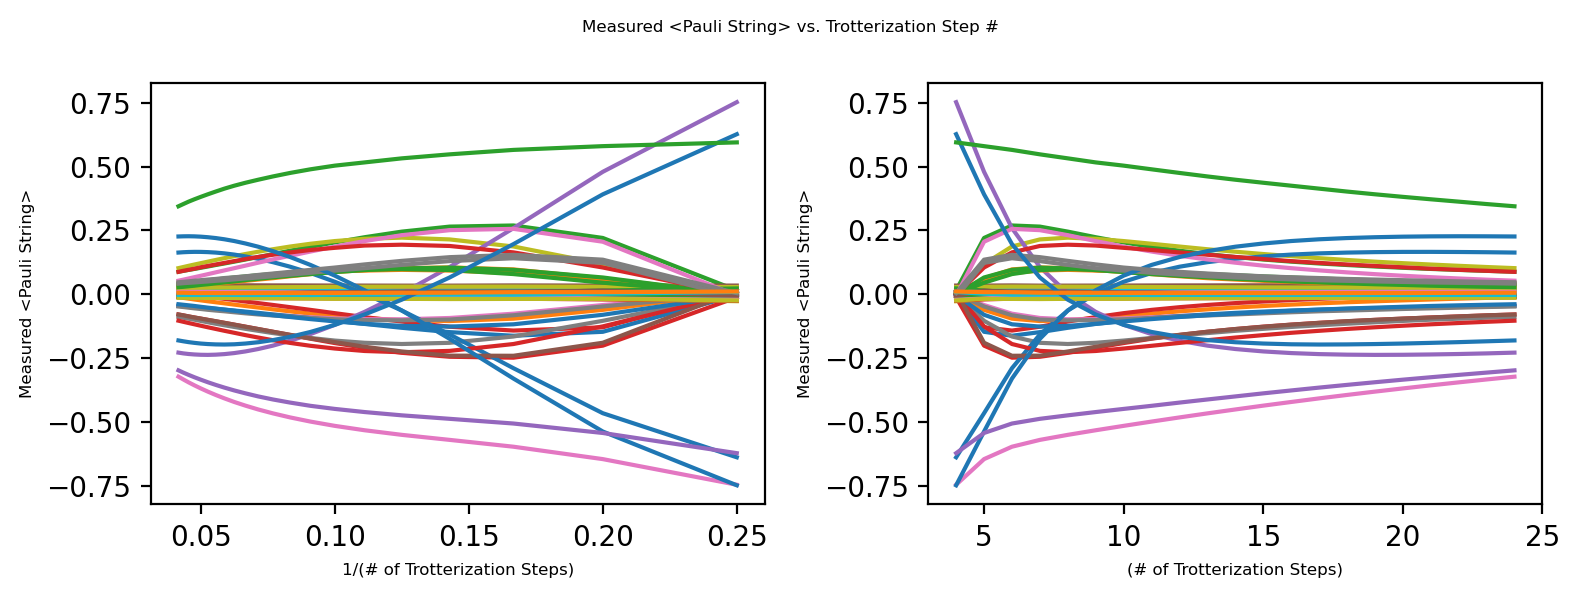

In [11]:
axs = plot_parity(res_analysis)

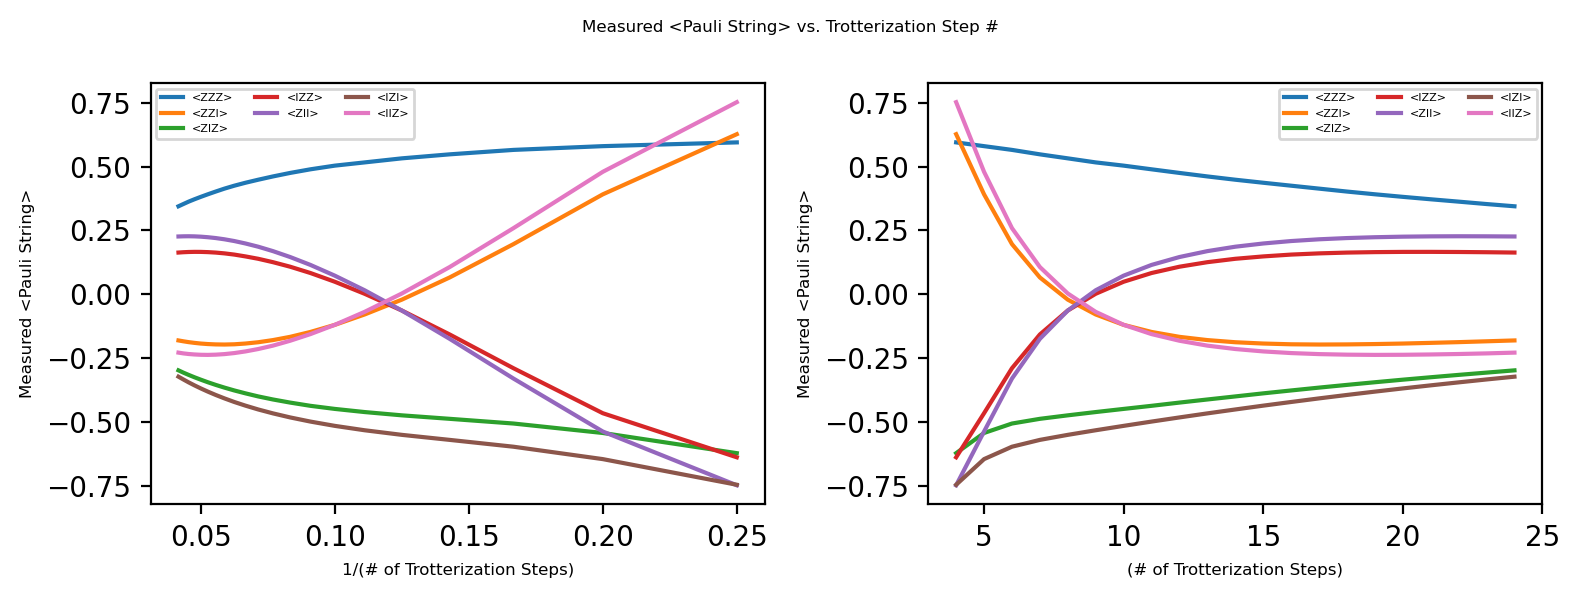

In [12]:
axs = plot_parity(res_analysis, parity_strings=["ZZZ", "ZZI", "ZIZ", "IZZ", "ZII", "IZI", "IIZ"], legend=True)

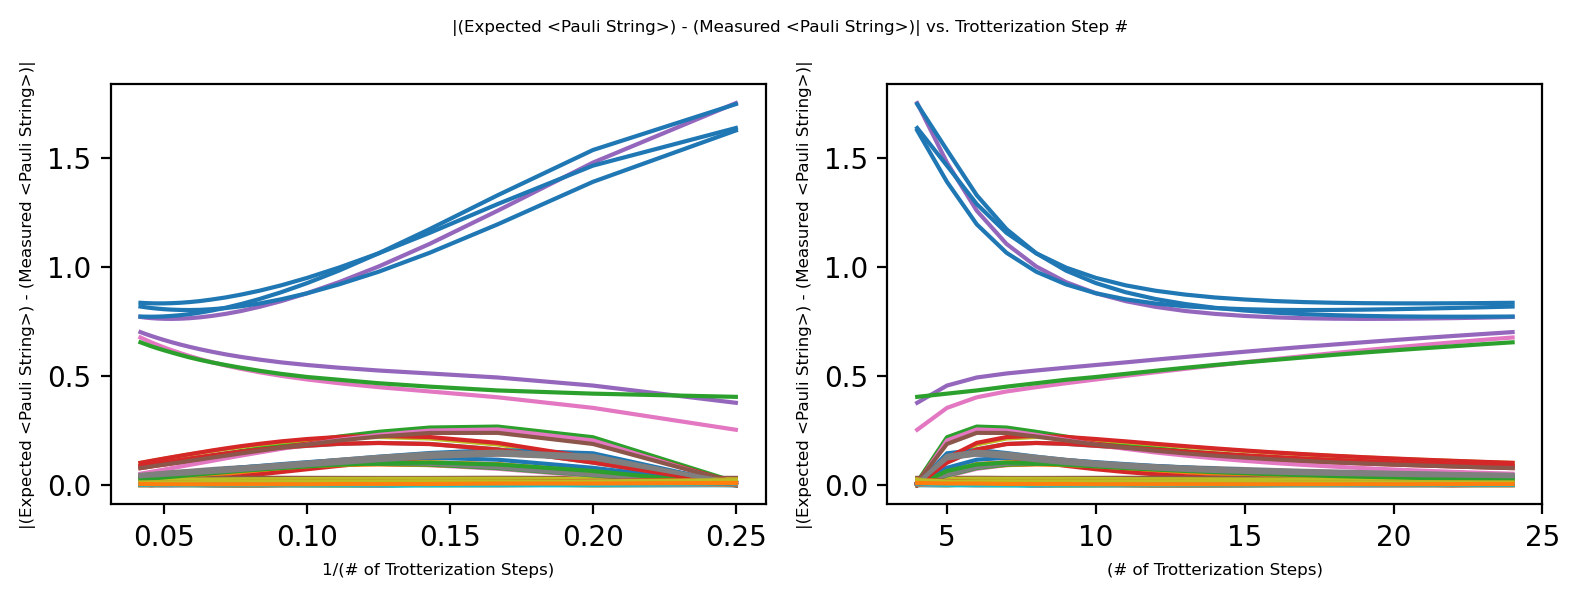

In [13]:
axs = plot_parity_dist(res_analysis)

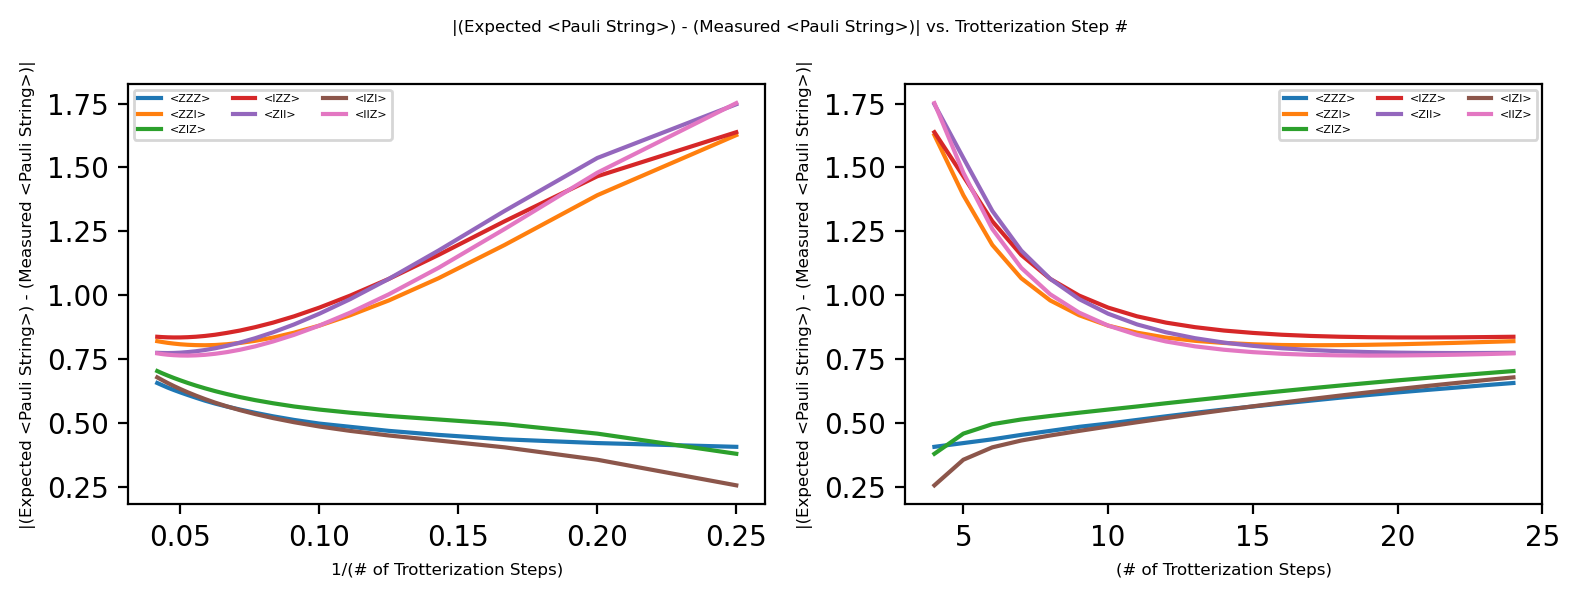

In [14]:
axs = plot_parity_dist(res_analysis, parity_strings=["ZZZ", "ZZI", "ZIZ", "IZZ", "ZII", "IZI", "IIZ"], legend=True)

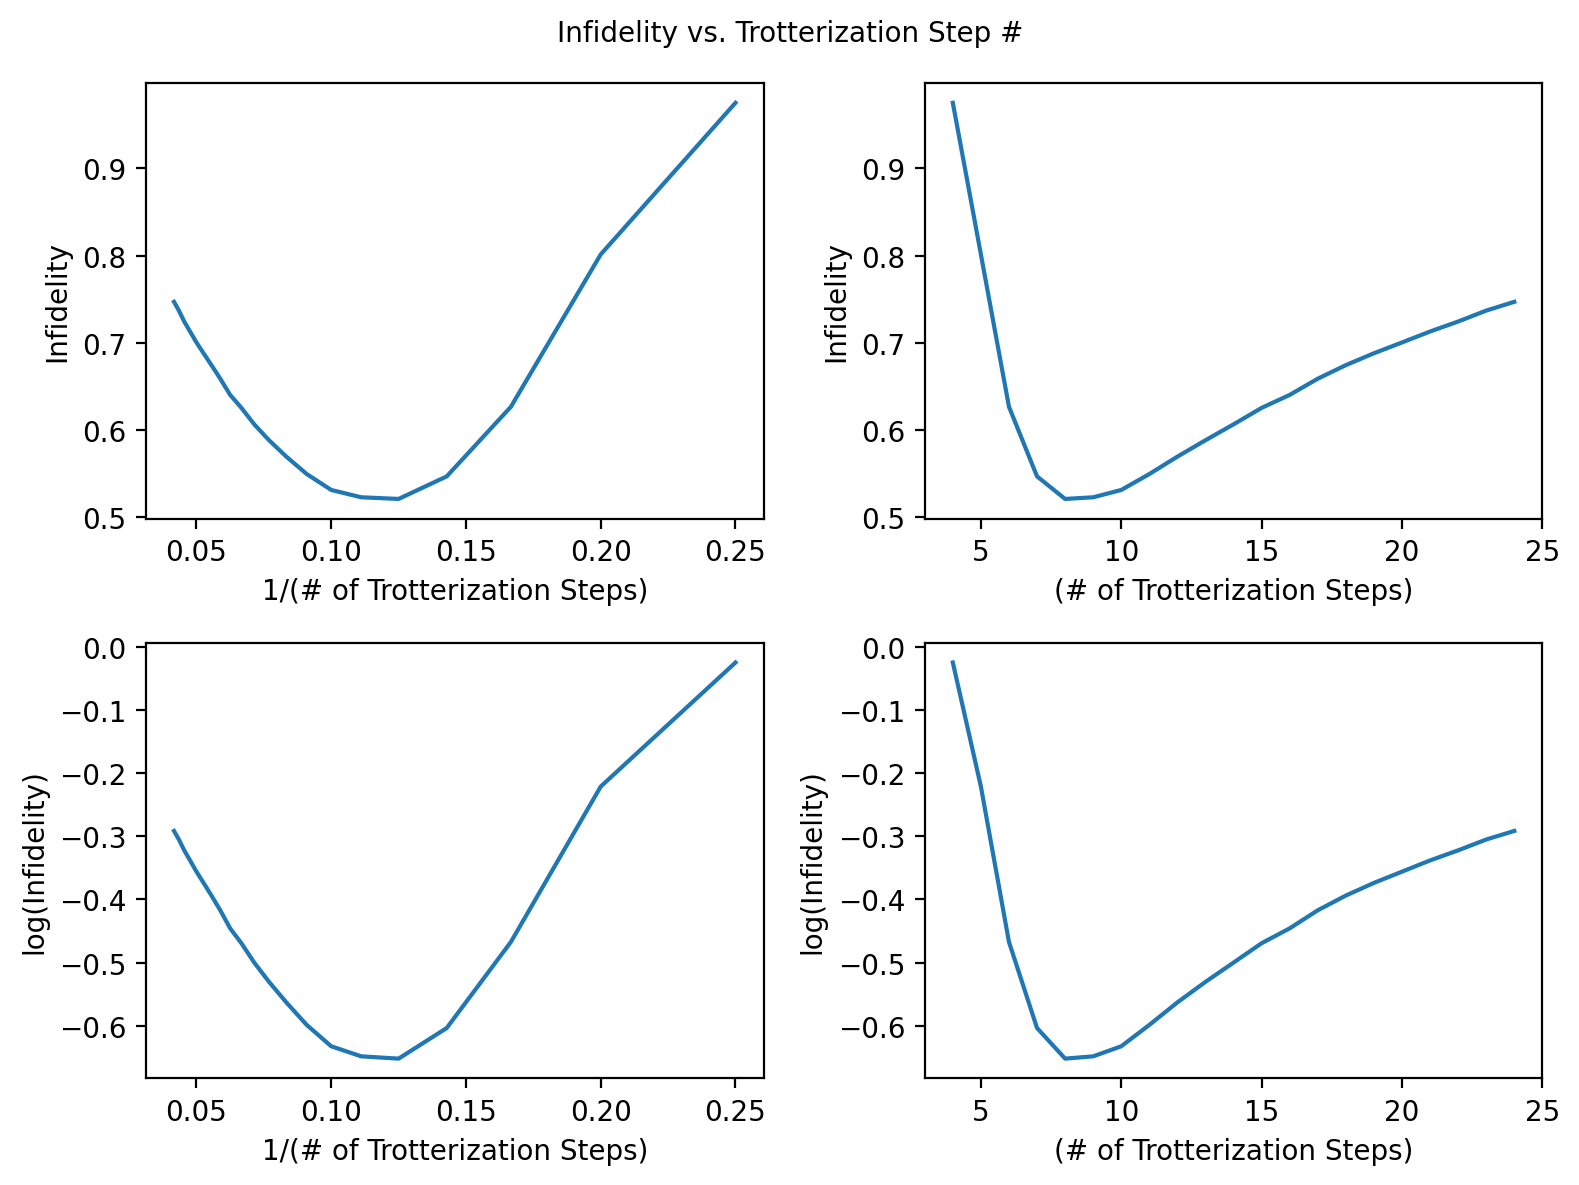

In [15]:
_ = plot_fidelities(res_analysis)

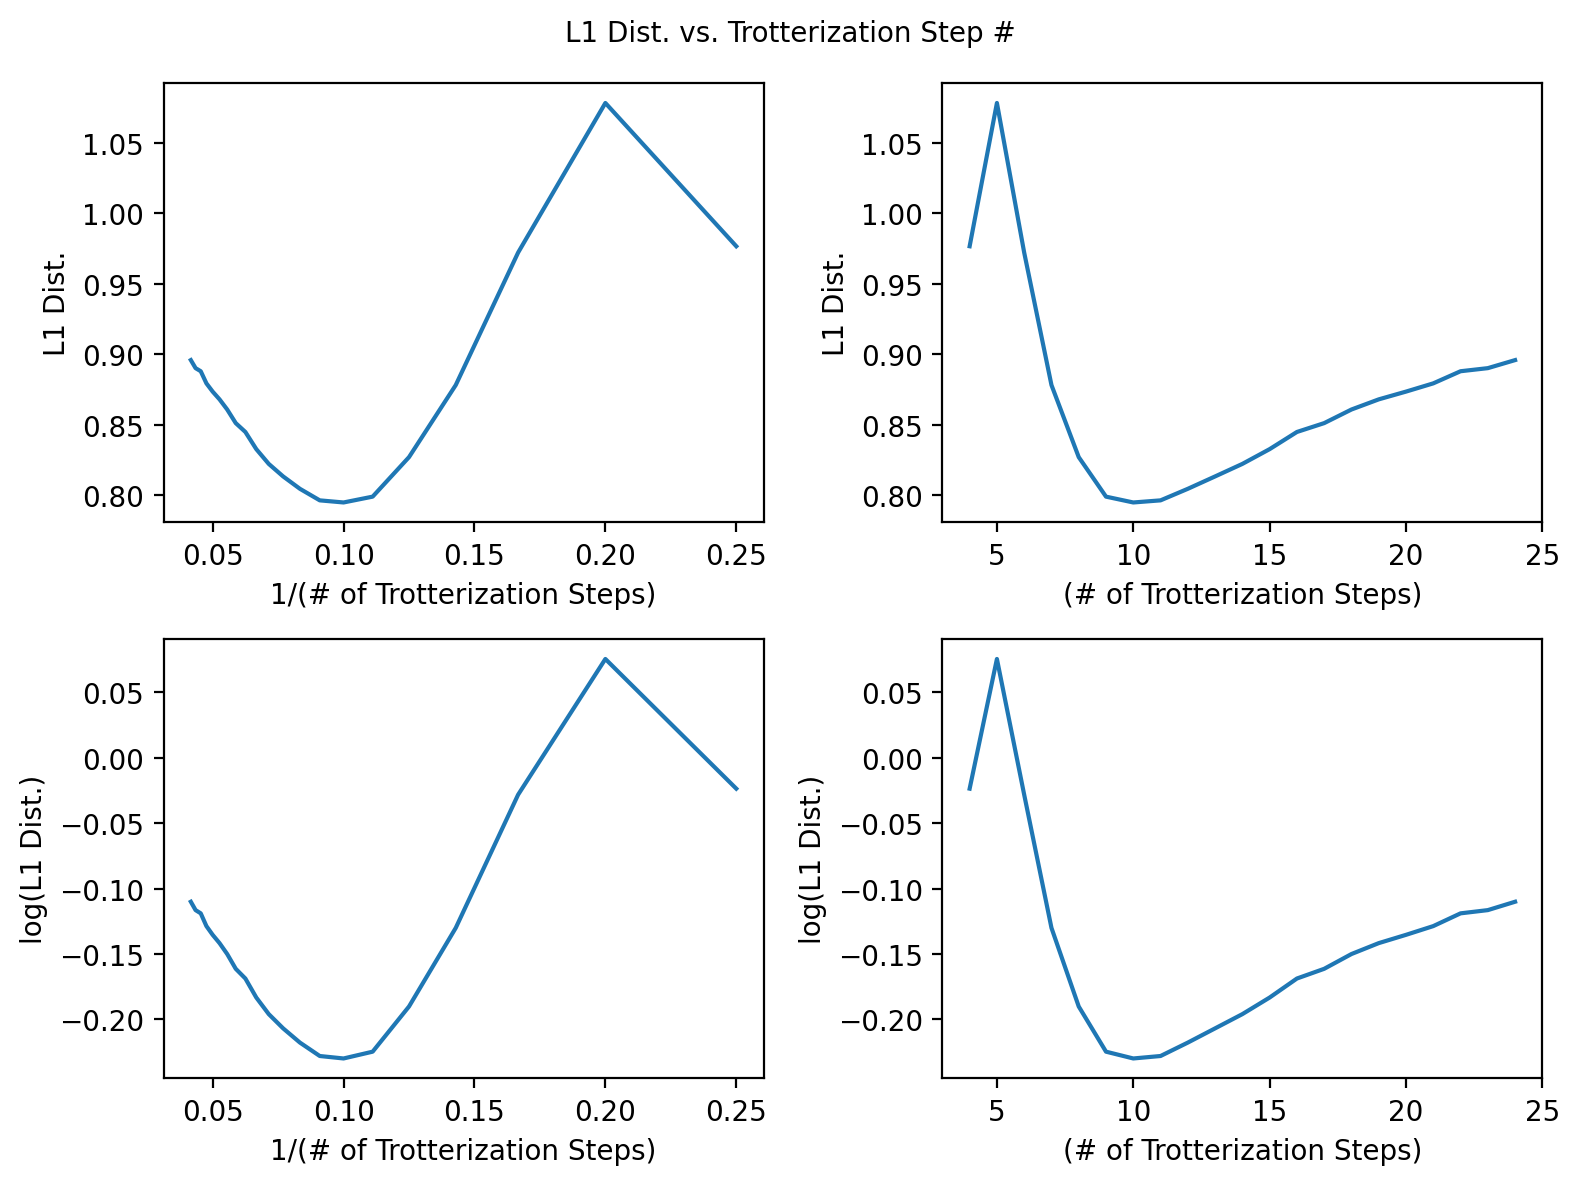

In [15]:
_ = plot_l1_dist(res_analysis)

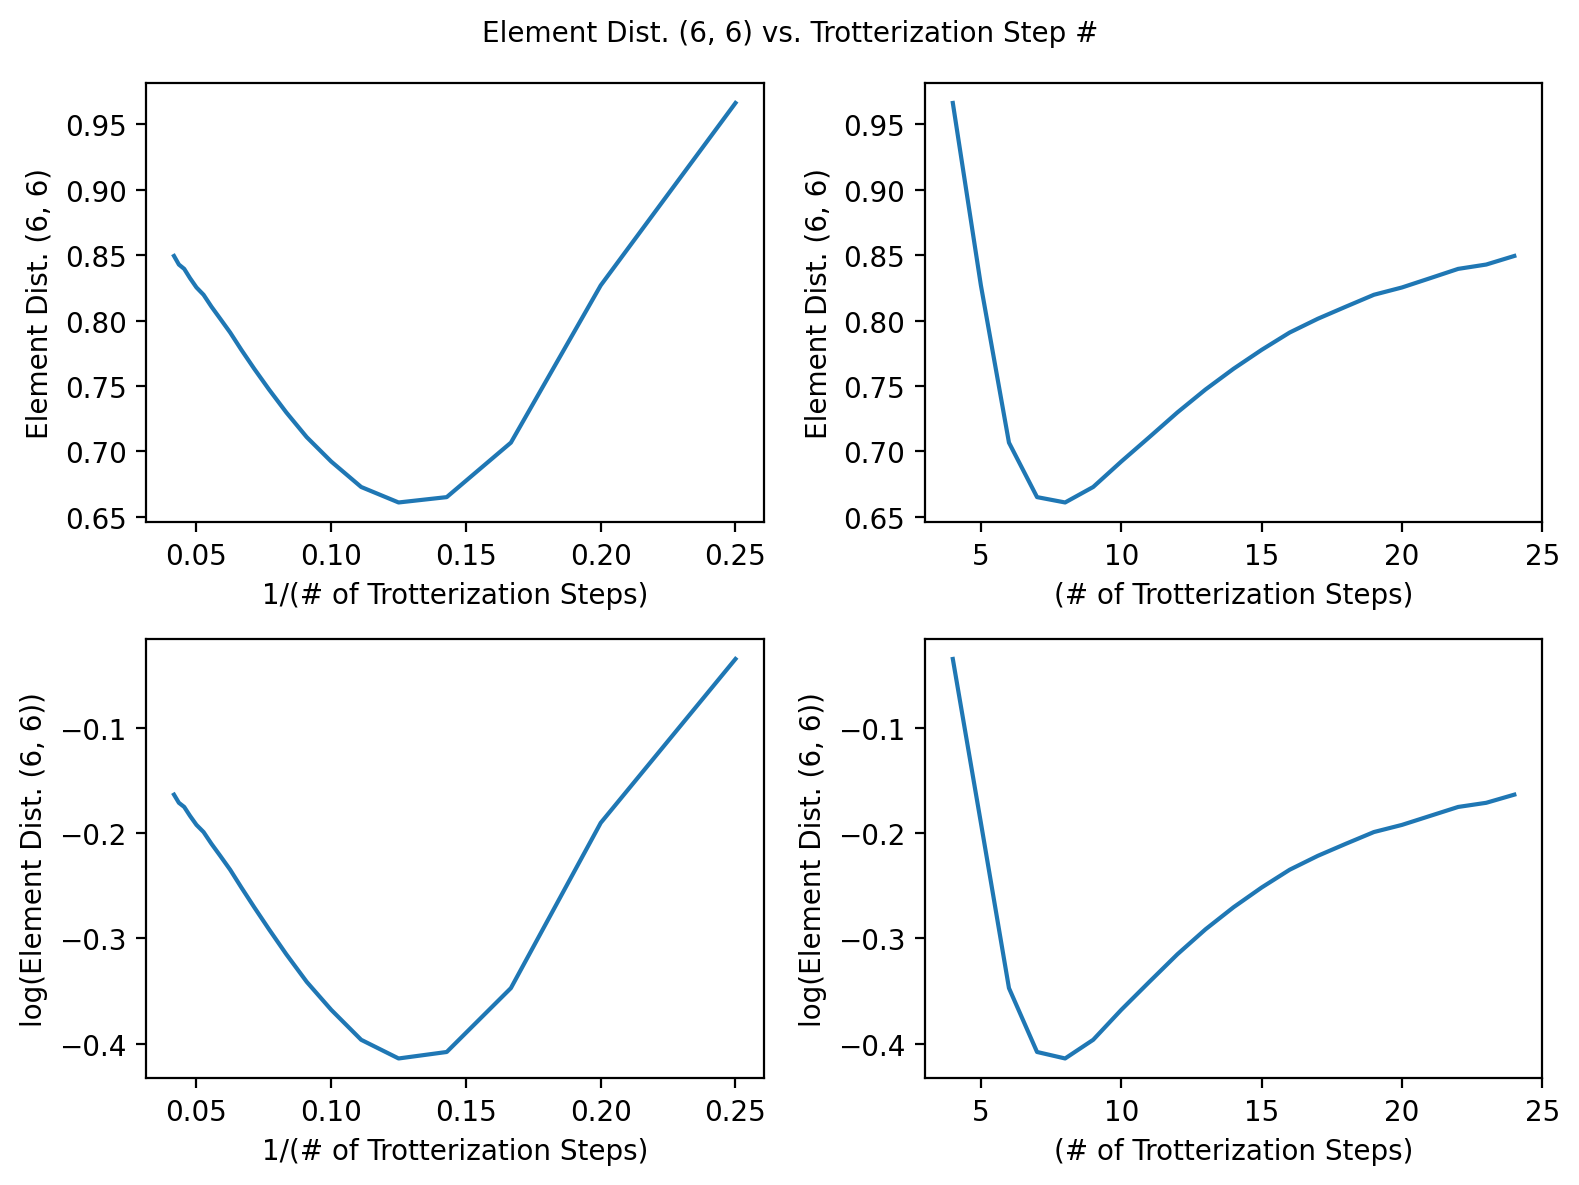

In [16]:
_ = plot_element_dist(res_analysis)

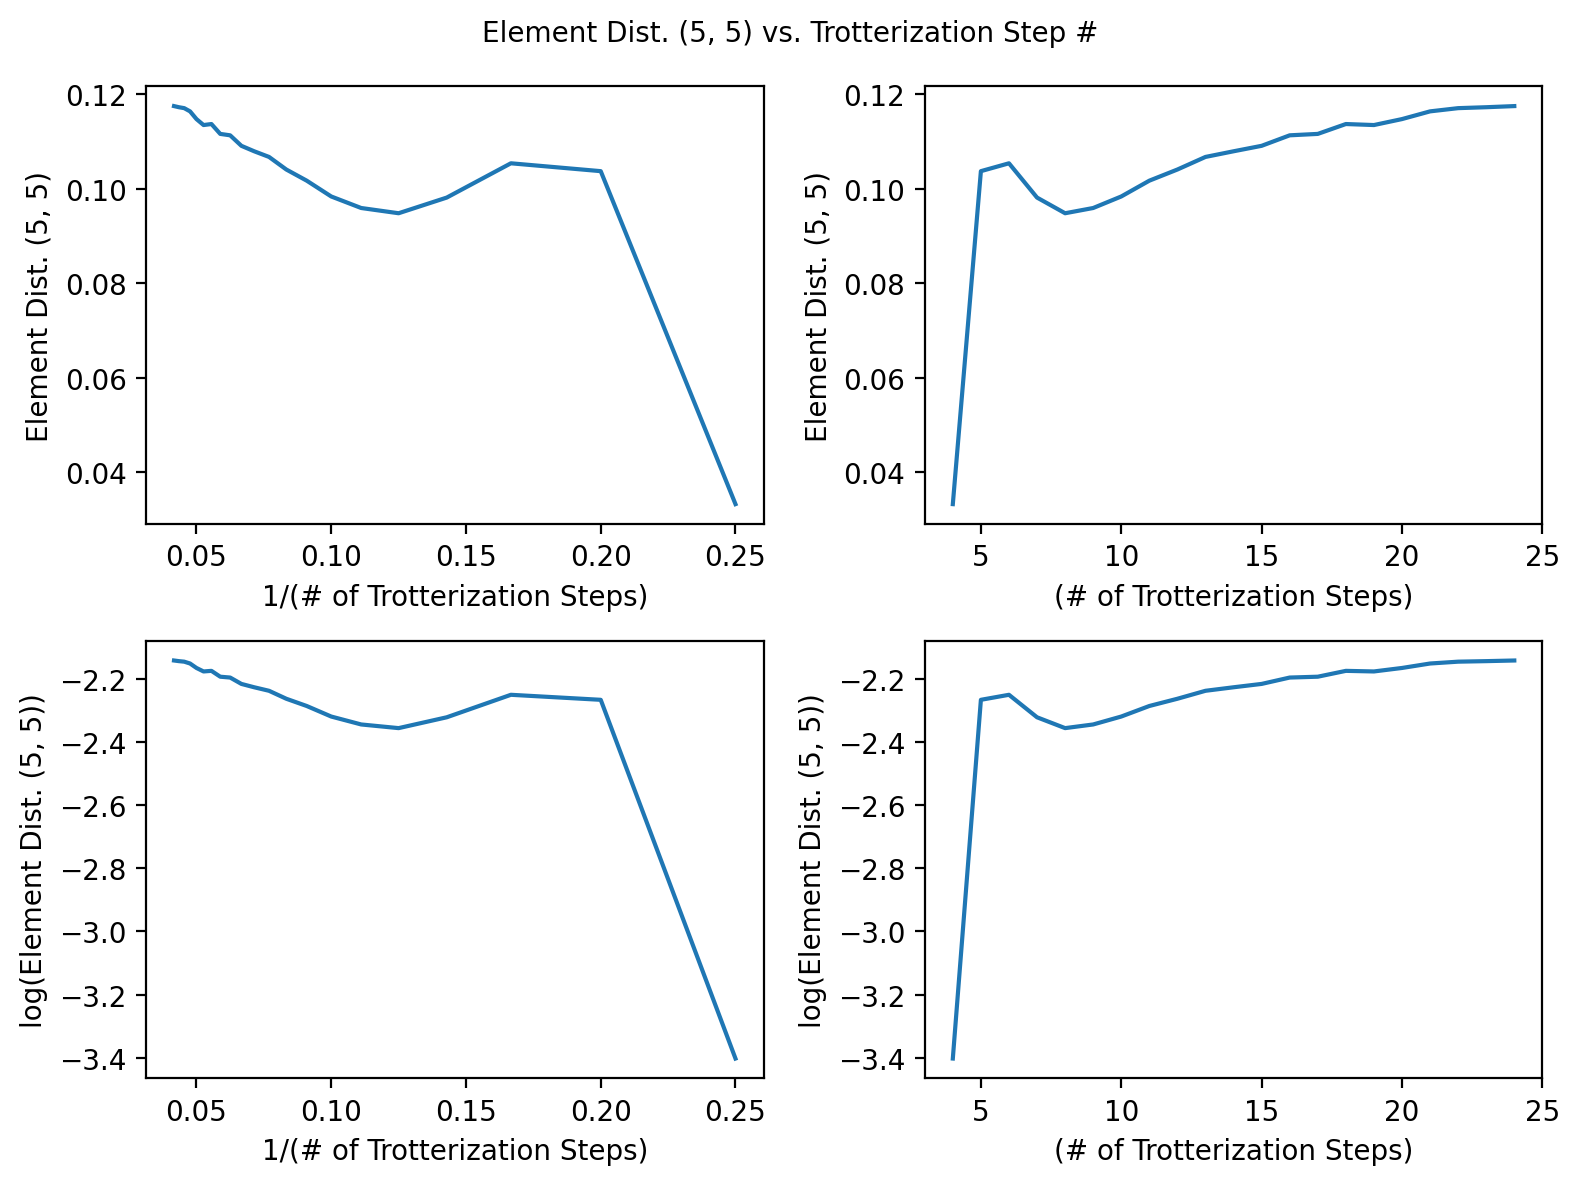

In [17]:
_ = plot_element_dist(res_analysis, row=5, col=5)

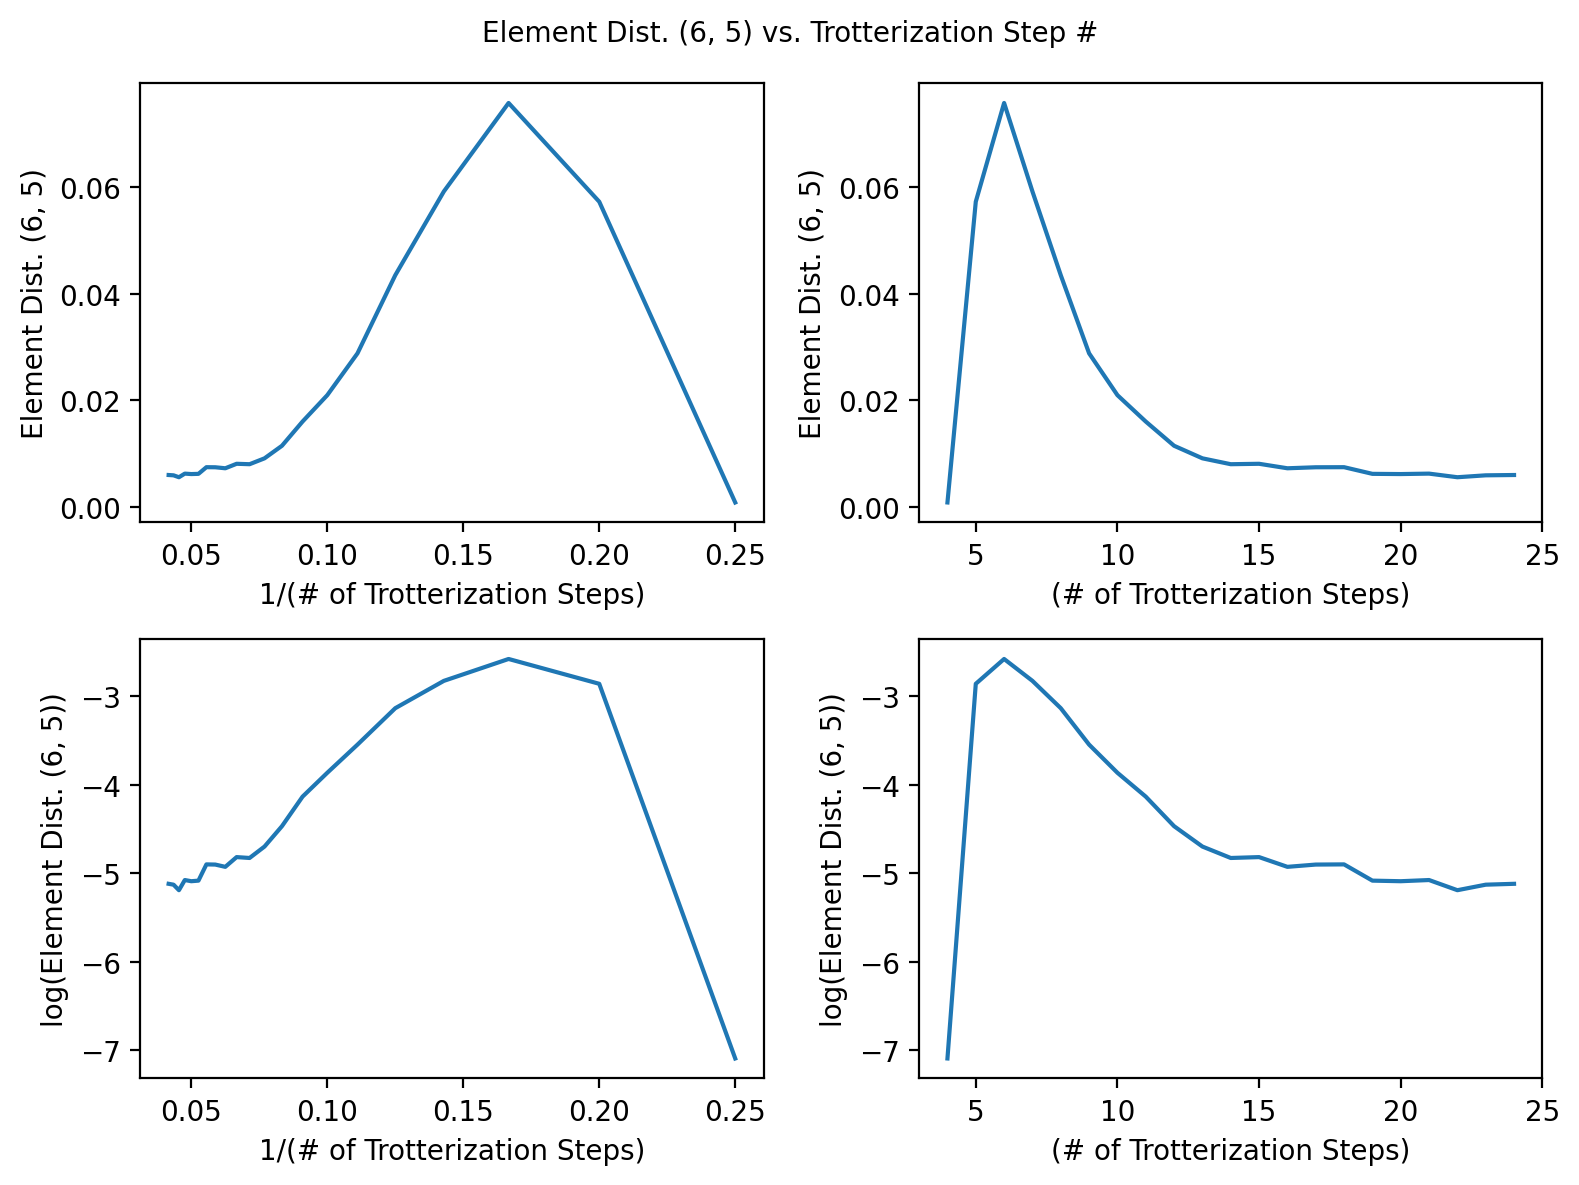

In [18]:
_ = plot_element_dist(res_analysis, row=6, col=5)

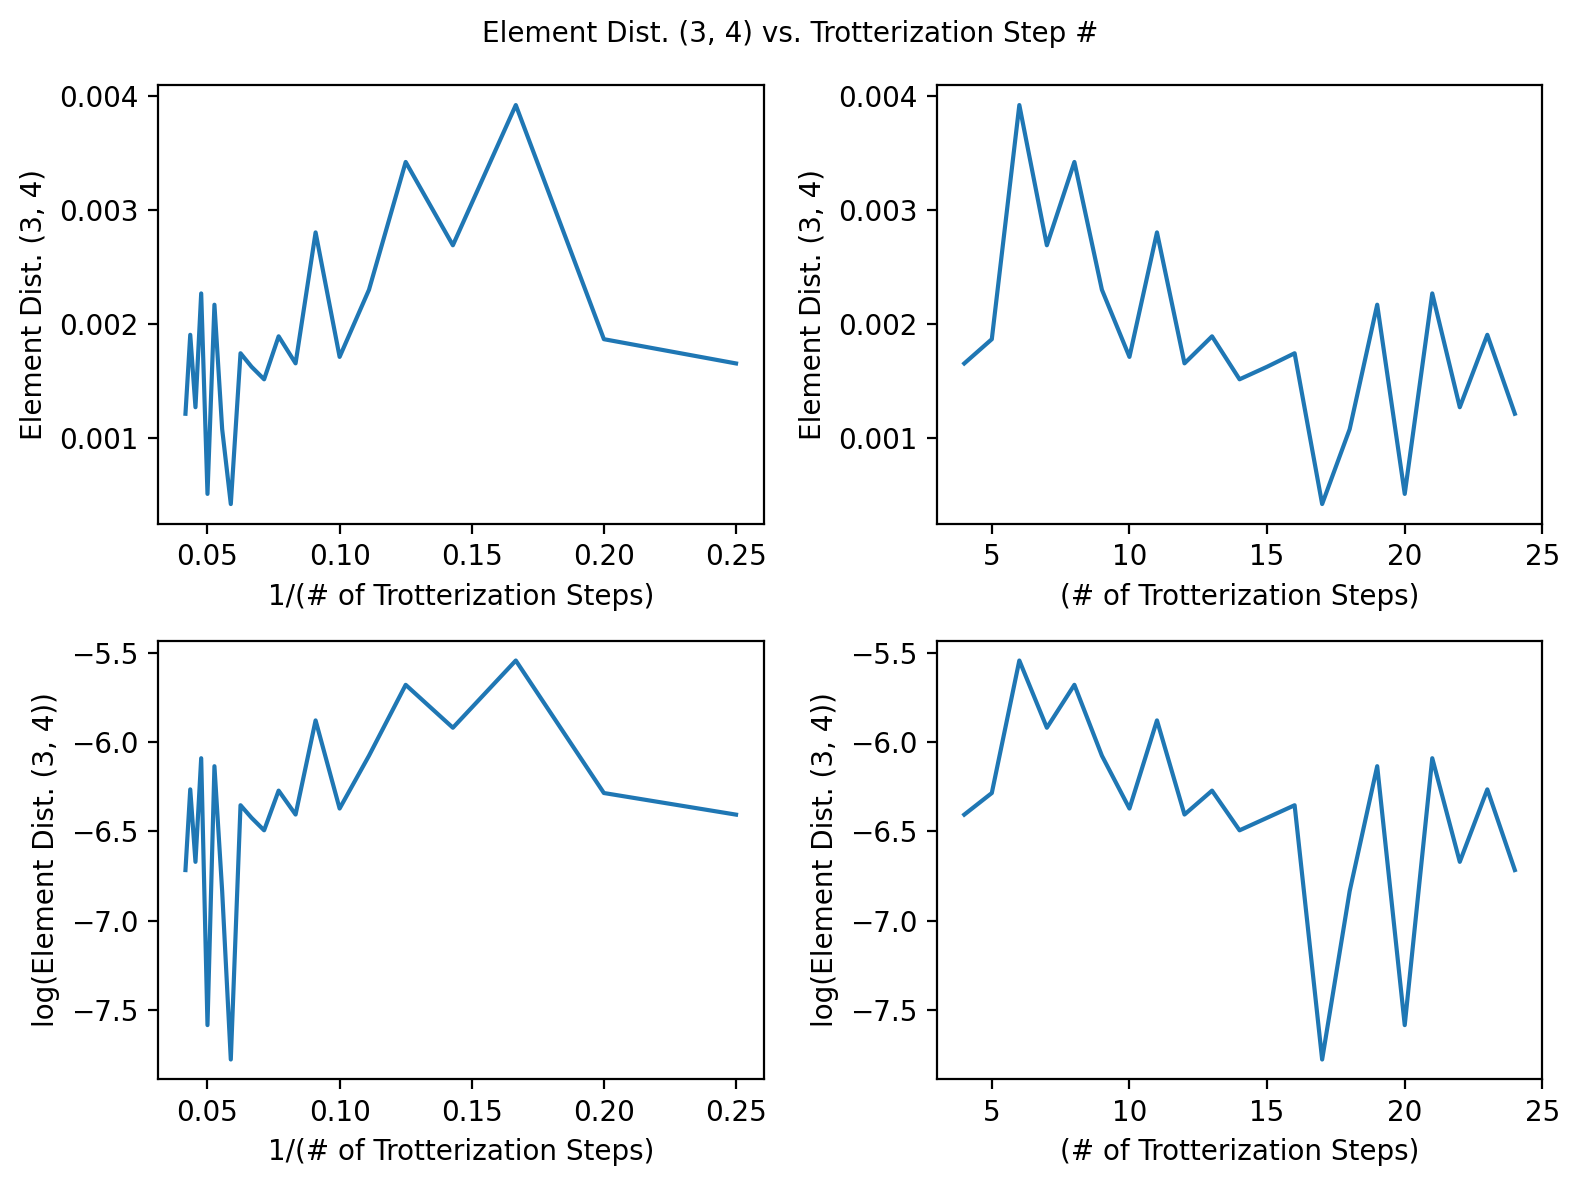

In [19]:
_ = plot_element_dist(res_analysis, row=3, col=4)